Analyse the related factors for survival in Tatanic's, such as Pclass, Age, Sex, Embarked, etc.
Deal the data with python
泰坦尼克号上的生还率和各因素（客舱等级、年龄、性别、上船港口等）的关系


In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt   

In [7]:
# it's difficult to upload the file from the local pc, try this later
# locpath = "E:/18 Data Analysis/05 Ryerson DA program/05-Ryerson-DA-program/CMTH642 Data Analytics Advanced Methods/Assignment1/USDA_Macronutrients.csv"
# locpath = "E:/18 Data Analysis/02 Kaggle/train.csv"
# # train <- read.csv('../input/train.csv', stringsAsFactors = F)
# # test  <- read.csv('../input/test.csv', stringsAsFactors = F)
# print(locpath)

E:/18 Data Analysis/02 Kaggle/train.csv


In [3]:
#### 1. Get the path
# upload the data file to google cloud firstly, then upload to dataframe
import os
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/My Drive/Colab Notebooks"


os.chdir(path)
os.listdir(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['python_sklean_by_gang_tian_20211212v02.ipynb',
 'housepricecode.ipynb',
 'python_sklearn_tutotrial - gang tian.ipynb',
 'Copy of Dot product.ipynb',
 'Untitled0.ipynb',
 'Untitled',
 'Untitled1.ipynb',
 'Untitled2.ipynb',
 'Untitled3.ipynb',
 'Untitled4.ipynb',
 'Untitled5.ipynb',
 'practical-machine-learning-with-pytorch-tbu.ipynb',
 'Untitled6.ipynb',
 'train.csv',
 'Titannic 2022-02-18.ipynb']

In [2]:
# can get the path from the menu of google corlab: the left button, Files
# /content/drive/MyDrive/Colab Notebooks

SyntaxError: ignored

In [4]:
# upload the data to df
titantic_df = pd.read_csv("train.csv")

In [5]:
# 1.describe the dataset
titantic_df.info()

# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 891 entries, 0 to 890
# Data columns (total 12 columns):
#  #   Column       Non-Null Count  Dtype  
# ---  ------       --------------  -----  
#  0   PassengerId  891 non-null    int64  
#  1   Survived     891 non-null    int64  
#  2   Pclass       891 non-null    int64  
#  3   Name         891 non-null    object 
#  4   Sex          891 non-null    object 
#  5   Age          714 non-null    float64
#  6   SibSp        891 non-null    int64  
#  7   Parch        891 non-null    int64  
#  8   Ticket       891 non-null    object 
#  9   Fare         891 non-null    float64
#  10  Cabin        204 non-null    object 
#  11  Embarked     889 non-null    object 
# dtypes: float64(2), int64(5), object(5)
# memory usage: 83.7+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titantic_df.shape
# (891, 12)
titantic_df.columns
# Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
#        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
#       dtype='object')

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
titantic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
titantic_df.isnull().sum()

# PassengerId      0
# Survived         0
# Pclass           0
# Name             0
# Sex              0
# Age            177
# SibSp            0
# Parch            0
# Ticket           0
# Fare             0
# Cabin          687
# Embarked         2
# dtype: int64


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

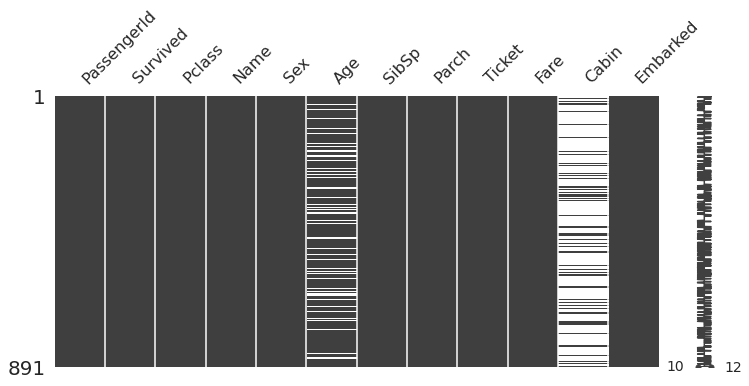

In [9]:
import missingno as msno
msno.matrix(titantic_df, figsize=(12, 5))
# amazing library for the statistics of the null data/

In [ ]:
# 2. Clean the data

In [10]:
# 2.1 clean the null of numeric type data 
# replace 'age' with median
age_median = titantic_df.Age.median()

titantic_df.Age.fillna(age_median, inplace = True)

titantic_df.Age.describe()

# count    891.000000
# mean      29.361582
# std       13.019697
# min        0.420000
# 25%       22.000000
# 50%       28.000000
# 75%       35.000000
# max       80.000000
# Name: Age, dtype: float64

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [11]:
# Let look the data further, add the factor of sex, upload df again
titantic_df = pd.read_csv("train.csv")

In [12]:
age_median_sex = titantic_df.groupby("Sex").Age.median() #分组计算不同舱位男女年龄的中位数
titantic_df.set_index("Sex", inplace=True) #设置Sex为索引， inplace=True表示在原数据titanic_df上直接进行修改
'''
Pandas 的值在运算的过程中，会根据索引的值来进行自动的匹配。
在这里我们可以看到上一步骤的Series：age_median_sex的索引是 female 和 male 两个值，
所以需要把原始数据titanic_df中的性别也设置为索引，用 fillna 自动匹配相应的索引进行填充。

'''

# seperate data with sex, and fill by median of sex
titantic_df.Age.fillna(age_median_sex, inplace=True) #用fillna填充缺失值，根据索引值填充
titantic_df.reset_index(inplace=True) #重置索引，取消Sex索引
titantic_df.Age.describe()

# count    891.000000
# mean      29.441268
# std       13.018747
# min        0.420000
# 25%       22.000000
# 50%       29.000000
# 75%       35.000000
# max       80.000000
# Name: Age, dtype: float64

'\nPandas 的值在运算的过程中，会根据索引的值来进行自动的匹配。\n在这里我们可以看到上一步骤的Series：age_median_sex的索引是 female 和 male 两个值，\n所以需要把原始数据titanic_df中的性别也设置为索引，用 fillna 自动匹配相应的索引进行填充。\n\n'

count    891.000000
mean      29.441268
std       13.018747
min        0.420000
25%       22.000000
50%       29.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [14]:
# seperate data wih Pclass
titantic_df = pd.read_csv("train.csv")
age_median_psex = titantic_df.groupby(["Pclass", "Sex"]).Age.median()
titantic_df.set_index(["Pclass", "Sex"], inplace=True)
titantic_df.Age.fillna(age_median_psex, inplace=True)
titantic_df.reset_index(inplace=True)
titantic_df.Age.describe()

# count    891.000000
# mean      29.112424
# std       13.304424
# min        0.420000
# 25%       21.500000
# 50%       26.000000
# 75%       36.000000
# max       80.000000
# Name: Age, dtype: float64

count    891.000000
mean      29.112424
std       13.304424
min        0.420000
25%       21.500000
50%       26.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

In [15]:
# 2.2 clean the null of data with the polular data
titantic_df.describe(include = [np.object])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


,Sex,Name,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,2,891,681,147,3
top,male,"Braund, Mr. Owen Harris",347082,B96 B98,S
freq,577,1,7,4,644


In [16]:
# also can statistic the number as well
titantic_df.Embarked.value_counts()
# S    644
# C    168
# Q     77
# Name: Embarked, dtype: int64

titantic_df.fillna({"Embarked": "S"}, inplace=True) #用“S”，填充Embarked列的缺失值
titantic_df[titantic_df.Embarked.isnull()] #查看缺失值填充效果

# Pclass	Sex	PassengerId	Survived	Name	Age	SibSp	Parch	Ticket	Fare	Cabin	Embarked
# there has no null data right now, so finish the cleaning data

,Pclass,Sex,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [ ]:
# 3. Data Analyse

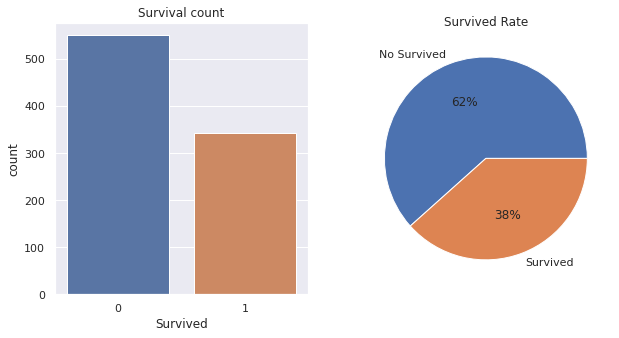

In [19]:
total_survived = titantic_df['Survived'].sum()
total_no_survived = 891 - total_survived

plt.figure(figsize=(10, 5)) # create the canvas
plt.subplot(121)
sns.countplot(x='Survived', data=titantic_df)
plt.title("Survival count")

plt.subplot(122)
plt.pie([total_no_survived, total_survived], labels=['No Survived', 'Survived'], autopct = '%1.0f%%')
plt.title("Survived Rate")

plt.show()

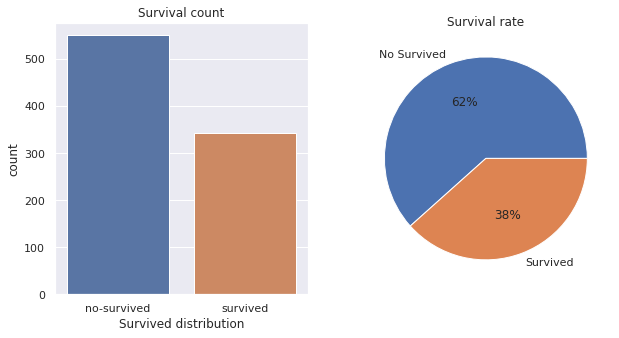

In [20]:
# as we can see, 0 means un survived, 1 survived, map them
titantic_df["Survived_cat"] = titantic_df["Survived"].map({0: "no-survived", 1: "survived"})

plt.figure(figsize=(10,5))
plt.subplot(121) #create the first sub plot
sns.countplot(x="Survived_cat", data=titantic_df)
plt.xlabel("Survived distribution")
plt.title("Survival count")

plt.subplot(122) #create the second sub plot
plt.pie([total_no_survived, total_survived], labels=["No Survived", "Survived"], autopct='%1.0f%%')
plt.title("Survival rate")

plt.show()

Analyse the Pclass, Sex, Age and Embarked with survived
分别探索下 Pclass、Sex、Age 和 Embarked 等与“生还率”的关系.
A. Pclass--Survived
A.舱位（Pclass）与生还率关系

In [32]:
# the number of person in differnt class
titantic_df.pivot_table(values="Name", index="Pclass", aggfunc="count")

,Name
Pclass,
1,216
2,184
3,491


In [33]:
# or we use group to analyse
titantic_df[['Pclass', 'Name']].groupby(['Pclass']).count()

,Name
Pclass,
1,216
2,184
3,491


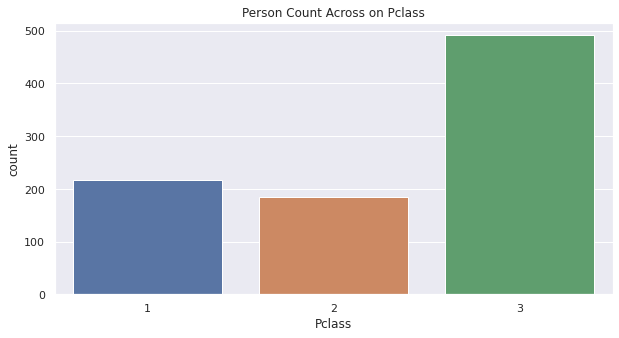

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(x='Pclass', data=titantic_df)
plt.title("Person Count Across on Pclass")

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


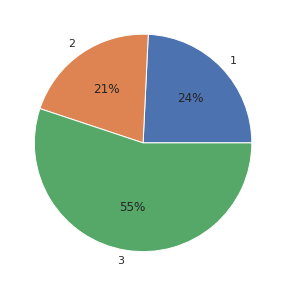

In [21]:
plt.figure(figsize=(10,5))
plt.pie(titantic_df[['Pclass', 'Name']].groupby(['Pclass']).count(),\
        labels=['1', '2', '3'], autopct='%1.0f%%')
plt.show()

In [36]:
# the relation of survived-Pclass
titantic_df.pivot_table(values="Survived", index="Pclass", aggfunc=np.mean)



,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


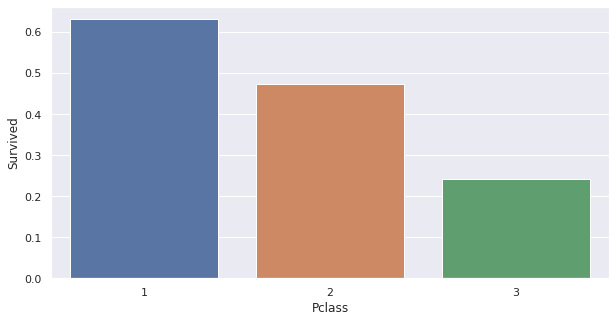

In [22]:
plt.figure(figsize=(10,5))
sns.barplot(data=titantic_df, x="Pclass", y="Survived", ci=None) #ci表示置信区间

plt.show()

In [23]:
# the relation of survived-sex
titantic_df.pivot_table(values="Survived",index="Sex",aggfunc=np.mean)

,Survived
Sex,
female,0.742038
male,0.188908


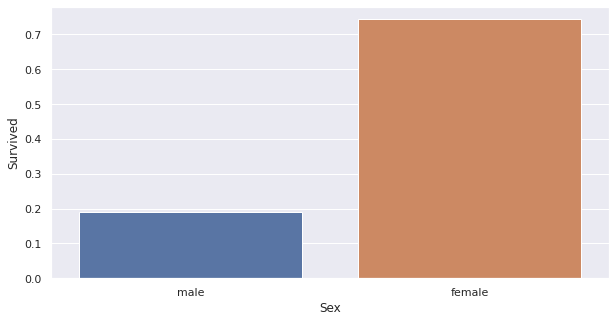

In [24]:
plt.figure(figsize=(10,5))
sns.barplot(data=titantic_df, x="Sex", y="Survived", ci=None)

plt.show()
# the greater rate for female

In [25]:
# the relation for survived-pclass+sex
titantic_df.pivot_table(values="Survived",index=["Pclass","Sex"],aggfunc=np.mean)

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

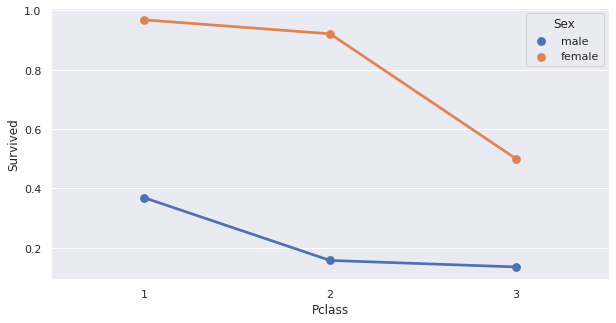

In [26]:
plt.figure(figsize= (10 ,5))
sns.pointplot(data=titantic_df,x="Pclass",y="Survived",hue="Sex",ci=None)

plt.show()

Conclution:
1. the female survival is bigger
2. the first class of male survival is bigger than 2, 3
3. the first second is similar for female, and third is very low
结论：1，在各个舱位中，女性的生还概率都远大于男性。

2，一二等舱的女性生还率接近，且远大于三等舱。

3，一等舱的男性生还率大于二三等舱，二三等舱的男性生还率接近。



In [27]:
# the relation for age and survival
titantic_df["AgeGroup"]=pd.cut(titantic_df["Age"],5)#将年龄列的数值划分为5等分
titantic_df.AgeGroup.value_counts(sort=False)#查看每个分组有多少人数

#输出：
# (0.34, 16.336]      100
# (16.336, 32.252]    523
# (32.252, 48.168]    188
# (48.168, 64.084]     69
# (64.084, 80.0]       11
# Name: AgeGroup, dtype: int64

(0.34, 16.336]      100
(16.336, 32.252]    493
(32.252, 48.168]    218
(48.168, 64.084]     69
(64.084, 80.0]       11
Name: AgeGroup, dtype: int64

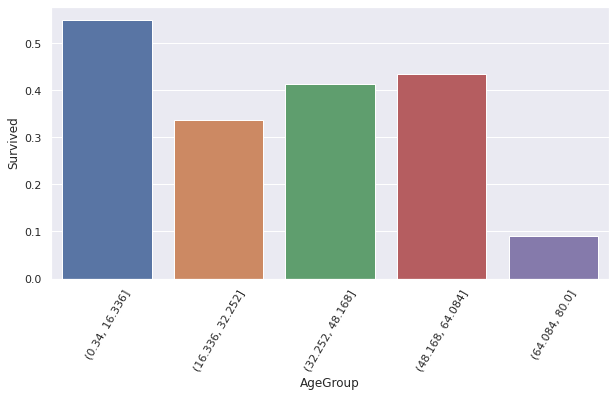

In [28]:
plt.figure(figsize= (10 ,5))
sns.barplot(data=titantic_df,x="AgeGroup",y="Survived",ci=None)
plt.xticks(rotation=60)#设置刻度标签角度

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


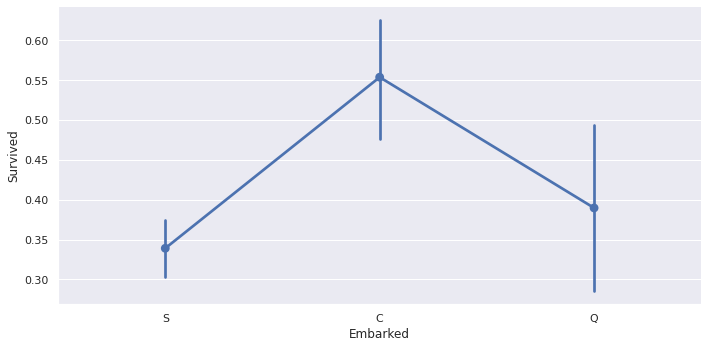

In [29]:
# the relation for survival- Embarked
sns.factorplot('Embarked','Survived', data=titantic_df,size=5,aspect=2)
plt.show()

In [30]:
# multifactors analyse: survival-age+sex
titantic_df.pivot_table(values="Survived",index="AgeGroup",columns="Sex",aggfunc=np.mean)

Sex,female,male
AgeGroup,,
"(0.34, 16.336]",0.673469,0.431373
"(16.336, 32.252]",0.701220,0.155015
"(32.252, 48.168]",0.818182,0.191489
"(48.168, 64.084]",0.916667,0.177778
"(64.084, 80.0]",NaN,0.090909


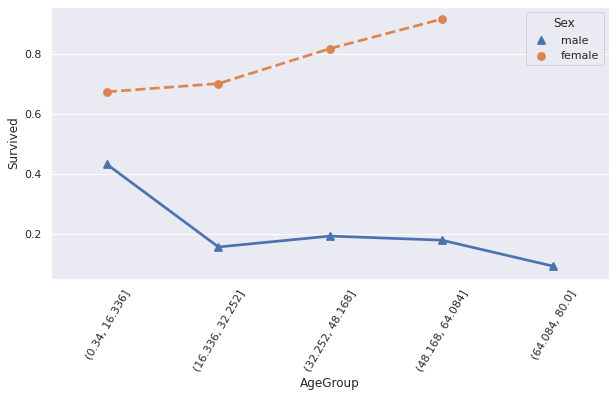

In [53]:
plt.figure(figsize= (10 ,5))
sns.pointplot(data=titantic_df,x="AgeGroup",y="Survived",hue="Sex",ci=None,
             markers=["^", "o"], linestyles=["-", "--"])
plt.xticks(rotation=60)

plt.show()

Conclusion: male young, adult female survival rate is high
结论：儿童少年，女性的生还率更高。男性生还的基本上都是儿童少年

In [31]:
# survival-agegroup+sex+pclass
titantic_df.pivot_table(values="Survived",index="AgeGroup",columns=["Sex","Pclass"],aggfunc=np.mean)

Sex                 female                          male                    
Pclass                   1         2         3         1         2         3
AgeGroup                                                                    
(0.34, 16.336]    0.833333  1.000000  0.545455  1.000000  0.818182  0.270270
(16.336, 32.252]  0.968750  0.921053  0.521277  0.444444  0.087719  0.138776
(32.252, 48.168]  1.000000  0.909091  0.250000  0.366667  0.074074  0.055556
(48.168, 64.084]  0.941176  0.833333  1.000000  0.269231  0.090909  0.000000
(64.084, 80.0]         NaN       NaN       NaN  0.166667  0.000000  0.000000

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


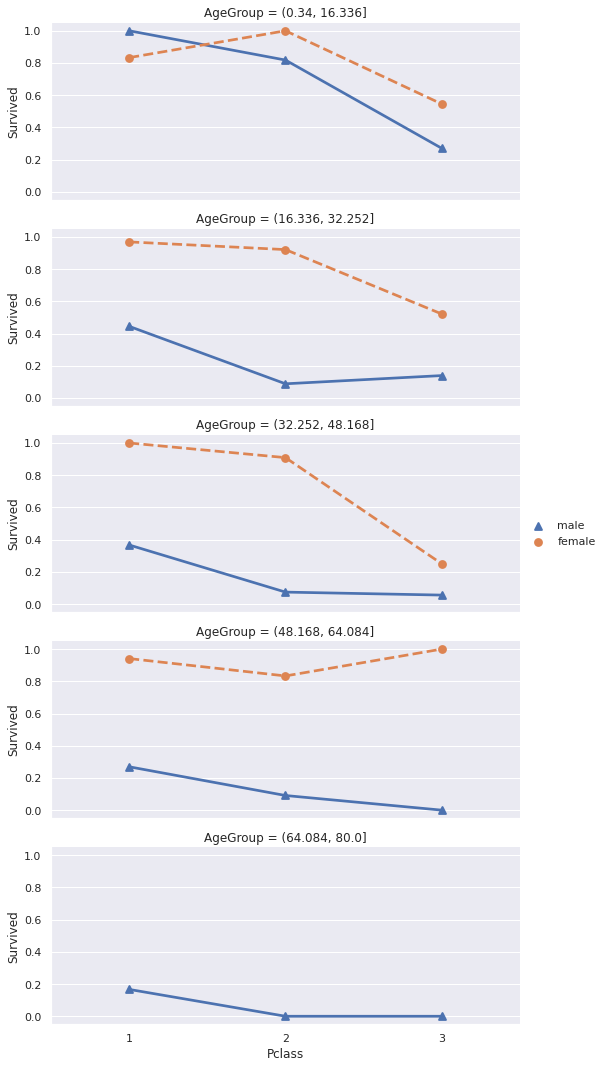

In [32]:
sns.FacetGrid(data=titantic_df,row="AgeGroup",aspect=2.5)\
.map(sns.pointplot,"Pclass","Survived","Sex",hue_order=["male","female"],ci=None,palette="deep", 
     markers=["^", "o"], linestyles=["-", "--"]).add_legend()

plt.show()

In [57]:
titantic_df.pivot_table(values="Survived",index="Sex",columns=["Pclass","Embarked"],aggfunc=np.mean)


Pclass           1                  2  ...                   3                    
Embarked         C    Q        S    C  ...         S         C         Q         S
Sex                                    ...                                        
female    0.976744  1.0  0.96000  1.0  ...  0.910448  0.652174  0.727273  0.375000
male      0.404762  0.0  0.35443  0.2  ...  0.154639  0.232558  0.076923  0.128302

[2 rows x 9 columns]

In [33]:
# survival-sex+pclass+embarked
titantic_df.pivot_table(values="Survived",index="Sex",columns=["Pclass","Embarked"],aggfunc=np.mean)


Pclass           1                  2  ...                   3                    
Embarked         C    Q        S    C  ...         S         C         Q         S
Sex                                    ...                                        
female    0.976744  1.0  0.96000  1.0  ...  0.910448  0.652174  0.727273  0.375000
male      0.404762  0.0  0.35443  0.2  ...  0.154639  0.232558  0.076923  0.128302

[2 rows x 9 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


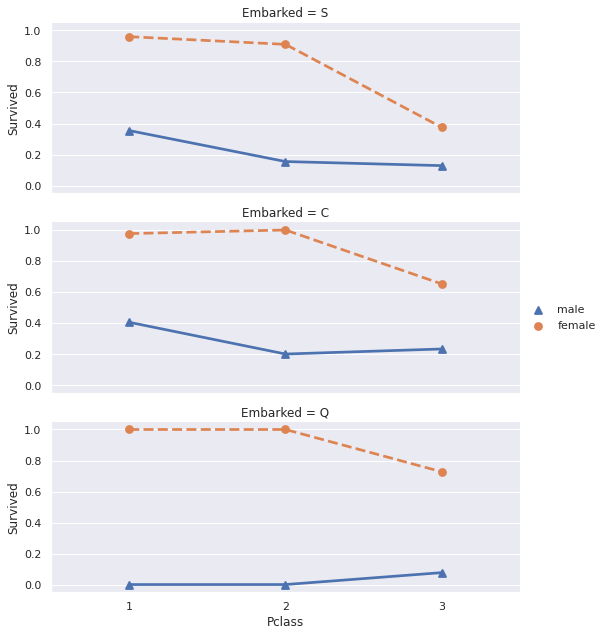

In [34]:
sns.FacetGrid(data=titantic_df,row="Embarked",aspect=2.5)\
.map(sns.pointplot,"Pclass","Survived","Sex",hue_order=["male","female"],ci=None,palette="deep", 
     markers=["^", "o"], linestyles=["-", "--"]).add_legend()

In [ ]:
# 本次分析主要探寻泰坦尼克号上的生还率和各因素（客舱等级、年龄、性别、上船港口等）的关系。

# 样本数量为 891，海难发生后，生还者还剩 342 人，生还率为 38%。
# 泰坦尼克号上有一\二\三等舱三种船舱类型，其中头等舱的生还概率最大，其次是二等舱，三等舱的概率最小。

# 891人中，男性共577人，女性314人，女性生还率远远大于男性。可见女性比男性在这次事故中更容易生还，表明“女士优先”的原则在本次事故中得到了发扬。

# 样本的 891 人中，最小年龄为 0.42 ，最大年龄 80。按照[(0.34, 16.336] < (16.336, 32.252] < (32.252, 48.168] < (48.168, 64.084] < (64.084, 80.0]]划分原则，划分为5组，儿童少年组的生还率最高，年龄越大，生还率越低。“尊老爱幼”的原则在本次事故中没有很好体现。
# 样本的 891 人中，从 C 上船的生还率最高， Q上船的 次之， S上船生还率 最低。

# 最后需要说明的是，此次数据分析的数据集是从总体中抽样而来的，如果抽样无偏，样本是从总体随机选取，根据中心极限定理，分析结果具有代表性，如果不是随机选出，那么分析结果就不可靠了。